In [1]:
# Imported libraies for KNN
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

Matplotlib is building the font cache; this may take a moment.


In [5]:
# Step 1: Creating dataset for customer with Annual income and spending score
data = {
    'CustomerID': list(range(1, 31)),  # 30 customers
    'Annual Income (k$)': [15, 16, 18, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 
                            80, 85, 90, 95, 100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150],
    'Spending Score': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72, 50, 88, 15, 85, 20,
                        90, 30, 95, 35, 78, 45, 82, 55, 79, 60, 84, 65, 80, 70, 75]
}

In [7]:
# Convert to DataFrame
df = pd.DataFrame(data)

In [9]:
df.head()

,CustomerID,Annual Income (k$),Spending Score
0,1,15,39
1,2,16,81
2,3,18,6
3,4,20,77
4,5,25,40


In [11]:
# Step 2: Select Featuring for Clustering in this case income and spending score
X = df[['Annual Income (k$)', 'Spending Score']]

In [13]:
# Step 3: Standardizing  the Data and making it fit.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

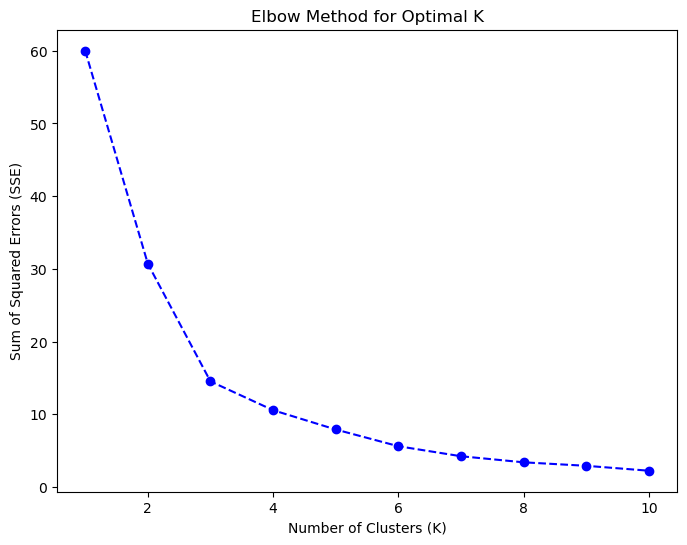

In [23]:
# Step 4: Using the Elbow Method to Find Optimal K
sse = []  # Sum of Squared Errors
K_range = range(1, 11)  # Testing K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=52, n_init=10)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  # Append SSE

# Plot Elbow Graph
plt.figure(figsize=(8, 6))
plt.plot(K_range, sse, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.show()

In [29]:
# Step 5: Apply K-Means with K=4 (from the elbow method)
kmeans = KMeans(n_clusters=4, random_state=52, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)  # Assign clusters to data


In [31]:
# Step 6: Visualizing the Clusters
plt.figure(figsize=(8, 5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

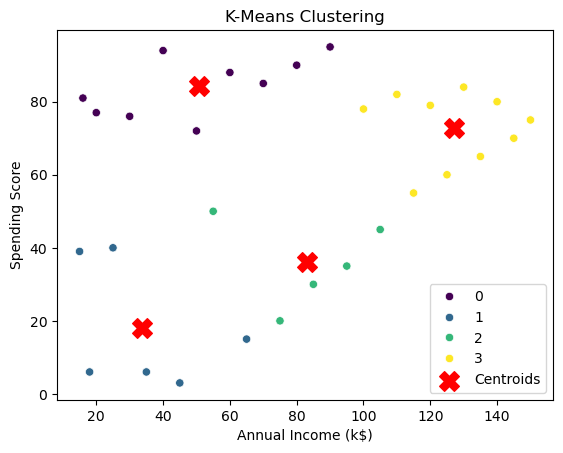

In [33]:
# Scatter plot of clustered data
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score'], hue=df['Cluster'], palette='viridis')

# Plot cluster centroids (convert back to original scale)
centroids = kmeans.cluster_centers_
centroids_original = scaler.inverse_transform(centroids)

plt.scatter(centroids_original[:, 0], centroids_original[:, 1], 
            color='red', marker='X', s=200, label='Centroids')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

In [35]:
# Step 7: Evaluate Clustering Performance
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.45
